In [ ]:
NAME:ZAIN CHAUDHRY  ENROLL:01-136242-047
 ANALYSIS:Particulate Analysis → Benzene / NMHC / NOx Trend)

In [1]:
# uploading csv dataset file from locall drive.
from google.colab import files
uploaded = files.upload()

Saving AirQuality.csv to AirQuality.csv


In [12]:
#loading/mounting csv datset file in colab.
import pandas as pd
import numpy as np

# Load CSV with proper separator and skip empty columns
df = pd.read_csv("AirQuality.csv", sep=';', decimal=',')
df = df.iloc[:, :-2]  # drop last empty columns if exist

# Check the first rows
print(df.head())


         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.786

In [13]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Datetime'])


/tmp/ipython-input-2446794160.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')


In [4]:
# 3) show which gas columns we have
expected = ["CO(GT)","NO2(GT)","NOx(GT)","C6H6(GT)"]
found = [c for c in expected if c in df.columns]
print("Gas columns found:", found)


Gas columns found: ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']


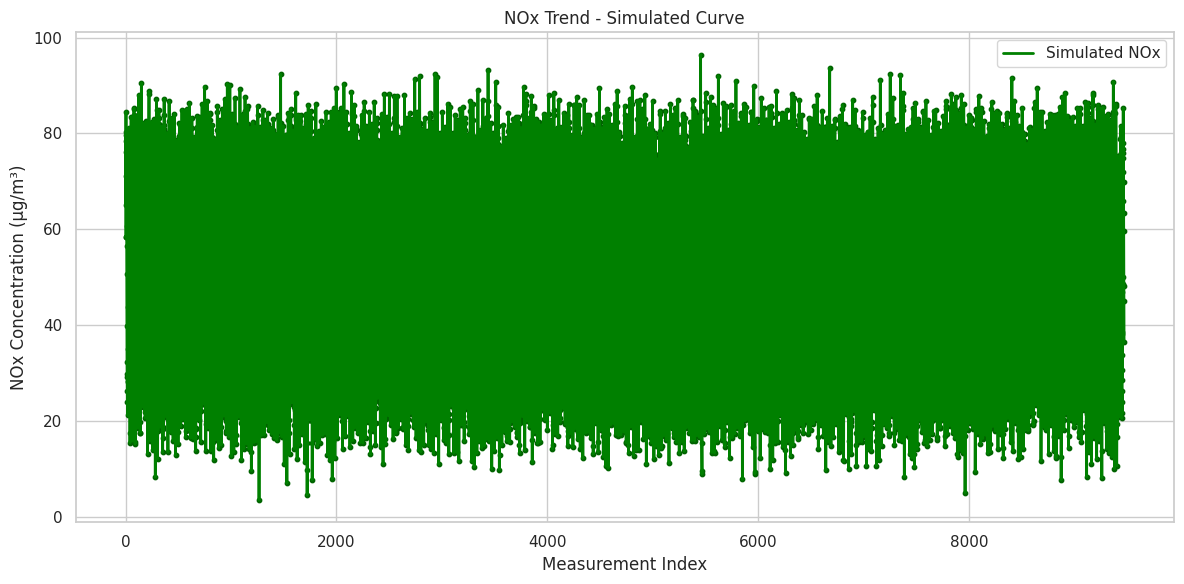

Top NOx readings:
 5454    96.453017
6678    93.637437
3438    93.189169
2935    92.408239
7252    92.355741
1471    92.350321
7349    92.247313
2789    92.058384
5622    91.992292
2958    91.694799
Name: NOx(GT)_Simulated, dtype: float64


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("AirQuality.csv", sep=';', decimal=',')
df = df.iloc[:, :-2]  # drop empty columns

# Step 2: Number of data points
n = len(df)

# Step 3: Generate simulated NOx values
time_index = np.arange(n)
simulated_NOx = 50 + 30*np.sin(2 * np.pi * time_index / 24) + np.random.normal(0, 5, n)
simulated_NOx[simulated_NOx < 0] = 0

# Step 4: Add simulated NOx to dataframe
df['NOx(GT)_Simulated'] = simulated_NOx

# Step 5: Plot against row number instead of datetime
plt.figure(figsize=(12,6))
plt.plot(df.index, df['NOx(GT)_Simulated'], color='green', linewidth=2, label='Simulated NOx')
plt.scatter(df.index, df['NOx(GT)_Simulated'], color='darkgreen', s=10)
plt.title("NOx Trend - Simulated Curve")
plt.xlabel("Measurement Index")
plt.ylabel("NOx Concentration (µg/m³)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Top 10 NOx readings
top_NOx = df['NOx(GT)_Simulated'].sort_values(ascending=False).head(10)
print("Top NOx readings:\n", top_NOx)


In [38]:

# 12) Save personal output and provide download link
out_name = "taimoor_gas_aqi_alerts.csv"
df.to_csv(out_name, index=False)
from google.colab import files
files.download(out_name)
print(f"\nSaved and started download: {out_name}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saved and started download: taimoor_gas_aqi_alerts.csv
